In [1]:
import numpy as np

In [2]:
x = np.array([[400, -201], [-800, 401]])
y = np.array([200, -200])

In [3]:
np.linalg.det(x)

-399.9999999999999

In [6]:
np.linalg.matrix_rank(x)

2

In [8]:
w = np.linalg.inv(x).dot(y)
w

array([-100., -200.])

In [11]:
x2 = np.array([[401, -201], [-800, 401]])

In [12]:
np.linalg.det(x2)

0.9999999999914522

In [13]:
np.linalg.matrix_rank(x2)

2

In [14]:
w2 = np.linalg.inv(x2).dot(y)
w2

array([40000.00000034, 79800.00000068])

In [15]:
np.linalg.cond(x)

2503.0046004808573

In [16]:
np.linalg.cond(x2)

1002003.0000501256

In [18]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Second part

In [140]:
from helpers import *
from costs import *
height, weight, gender = load_data_from_ex02(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [130]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    D = tx.shape[1]
    G = tx.T.dot(tx)
    if(np.linalg.matrix_rank(G)==D):
        w = np.linalg.inv(G).dot(tx.T).dot(y)
    else:
        w = np.linalg.solve(G,tx.T.dot(y))
    loss = compute_loss(y, tx, w)
    return w, loss

In [131]:
 #least squares
w_ls, loss_ls = least_squares(y, tx)
print("Least squares: loss*={l}, w0*={w0}, w1*={w1}".format(l=loss_ls, w0=w_ls[0], w1=w_ls[1]))

Least squares: loss*=13.643434811522654, w0*=73.63227245973111, w1*=14.475704876437085


In [132]:
xt = np.random.rand(tx.shape[0], tx.shape[1])
yt = xt.dot(w_ls)

0.005685320438063885

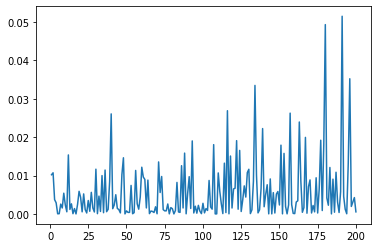

In [162]:
import matplotlib.pyplot as plt
randomIndex = np.random.randint(0, 200)
eps = 0.0001
L = []
for i in range(0,200):
    Ln = (tx[i, :].dot(w_ls) - y[i])**2
    Ln = Ln/(y[i]**2 + eps)
    L.append(Ln)
plt.plot(np.arange(1,201), L)
Ls = np.sum(L)/(len(y))
Ls
#Ln = (tx[randomIndex, :].dot(w_ls) - y[randomIndex])**2
#Ln = Ln/(y[randomIndex]**2 + eps)
#Ln

In [158]:
def compute_loss_2 (y, x, w):
    N = len(y)
    eps = 0.0001
    L = (tx.dot(w) - y)**2
    L = L/(y**2+eps)
    return np.sum(L)/N

In [161]:
L2 = compute_loss_2(y,tx,w_ls)
#Ls = np.sum(L)
#Ls
L2.shape
tx.shape
y.shape
L2
#np.setdiff1d(L,L2)
#plt.plot(L)

0.005685320438063885

In [165]:
def compute_gradient_2 (y,x,w):
    N=len(y)
    i = (tx.dot(w) - y)**2
    i = i/(y**2+eps)
    g = tx.T.dot(i)
    g = -2*g
    return g/N

In [166]:
compute_gradient_2(y,tx,w_ls)

array([-0.01137064,  0.00356315])

In [168]:
#sensitive
y = 1
x = 2
y1 = 10
y2 = 100

L1 = ((y1-y)**2)/(y**2+1)
L2 = ((y2-y)**2)/(y**2+1)
print(L1, L2) #the error is 100 times higher (goes like diff^2)

40.5 4900.5


In [170]:
L1t = (np.log10(y1+1) - np.log10(y+1))**2
L2t = (np.log10(y2+1) - np.log10(y+1))**2
print(L1t,L2t) #less sensible!!

0.5481369119951501 2.9012015187733686
